In [7]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [8]:
create_experiment_snapshots([25, 50, 75, 100])

In [9]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True


Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 4
MTD: ServiceDiversity triggered 0.0s
Static period: 30.20630100773542
Action: 2
MTD: ServiceDiversity triggered 101.9s
Static period: 29.225150834652908
Action: 4
MTD: ServiceDiversity triggered 202.1s
Static period: 29.566483882408136
Action: 3
MTD: ServiceDiversity triggered 302.3s
Static period: 29.969671221229305
Action: 3
MTD: OSDiversity triggered 402.6s
Static period: 20.004448081655084
Action: 4
MTD: OSDiversity triggered 502.7s
Static period: 21.131061550459094
Action: 4
MTD: OSDiversity triggered 604.1s
Static period: 20.244293439906414
Action: 0
Static period: 20.244293439906414
Action: 2
MTD: OSDiversity triggered 704.9s
Static period: 20.085325088161653
Action: 1
MTD: CompleteTopologyShuffle triggered 805.0s
Static period: 100.09372576895646
Action: 1
MTD: CompleteTopologyShuffle triggered 905.1s
M

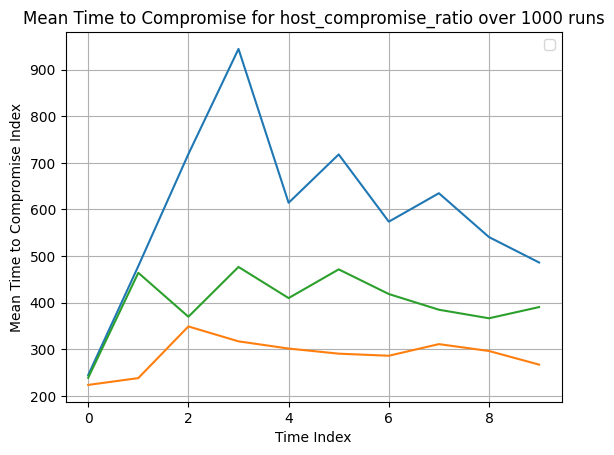

In [10]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["host_compromise_ratio"]
model = "main_network_final_host_compromise_ratio"
for run_index in range(1,101):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {features[0]} over 100 runs')
plt.grid(True)
plt.legend()
plt.show()



Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 0
Static period: 0
Action: 2
MTD: IPShuffle triggered 0.0s
Static period: 100.17665048754256
Action: 2
MTD: IPShuffle triggered 100.2s
MTD: Interrupted EXPLOIT_VULN at 112.3s!
Static period: 88.05239663282583
Action: 3
MTD: IPShuffle triggered 200.3s
Static period: 101.05892734695101
Action: 1
MTD: IPShuffle triggered 301.4s
MTD: Interrupted EXPLOIT_VULN at 310.4s!
Static period: 91.04394286493391
Action: 2
MTD: IPShuffle triggered 401.4s
Static period: 100.00198234042023
Action: 2
MTD: IPShuffle triggered 501.4s
MTD: Interrupted EXPLOIT_VULN at 512.3s!
Static period: 89.50071995387032
Action: 3
MTD: IPShuffle triggered 601.8s
Static period: 100.13578623298099
Action: 4
MTD: OSDiversity triggered 701.9s
MTD: Interrupted EXPLOIT_VULN at 713.0s!
Static period: 19.957959904117843
Action: 1
MTD: OSDiversity triggered

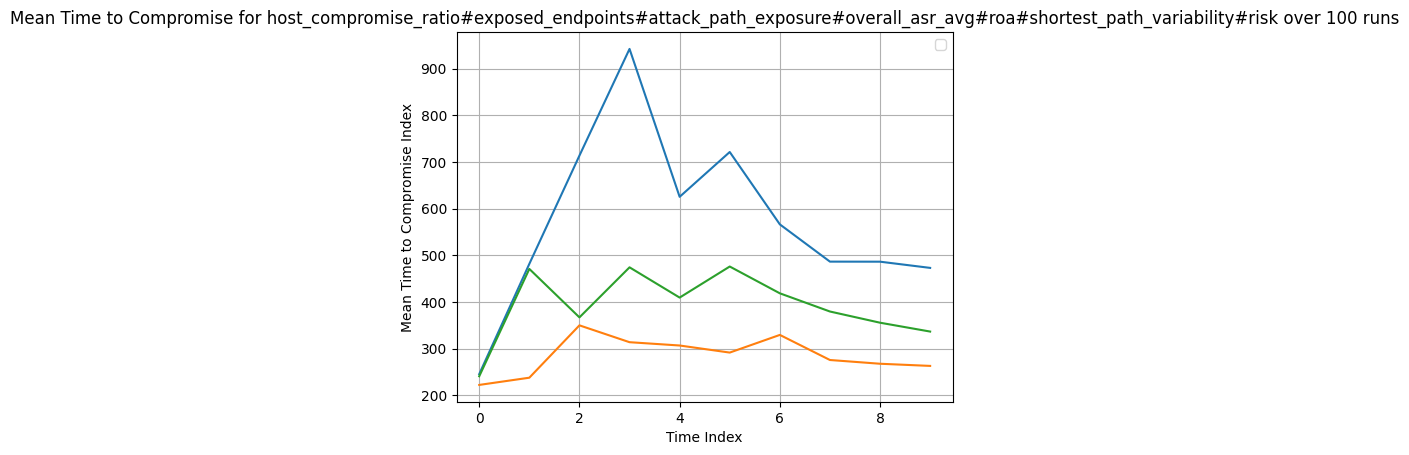

In [12]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
model = "main_network_final_host_compromise_ratio#exposed_endpoints#attack_path_exposure#overall_asr_avg#roa#shortest_path_variability#risk"
for run_index in range(1,101):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {"#".join(features)} over 100 runs')
plt.grid(True)
plt.legend()
plt.show()



Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 2
MTD: IPShuffle triggered 0.0s
Static period: 100.33516721953599
Action: 2
MTD: IPShuffle triggered 100.3s
MTD: Interrupted EXPLOIT_VULN at 110.0s!
Static period: 90.79716051157948
Action: 2
MTD: IPShuffle triggered 200.8s
Static period: 100.97721123300536
Action: 1
MTD: IPShuffle triggered 301.8s
MTD: Interrupted BRUTE_FORCE at 311.4s!
Static period: 91.21073017338256
Action: 4
MTD: IPShuffle triggered 402.6s
Static period: 100.8852630403369
Action: 3
MTD: IPShuffle triggered 503.5s
MTD: Interrupted EXPLOIT_VULN at 512.6s!
Static period: 90.82386952358604
Action: 3
MTD: IPShuffle triggered 603.5s
Static period: 100.15618705686813
Action: 1
MTD: OSDiversity triggered 703.6s
MTD: Interrupted SCAN_PORT at 714.7s!
Static period: 19.728202096279233
Action: 3
MTD: OSDiversity triggered 803.9s
Static period: 19.980696

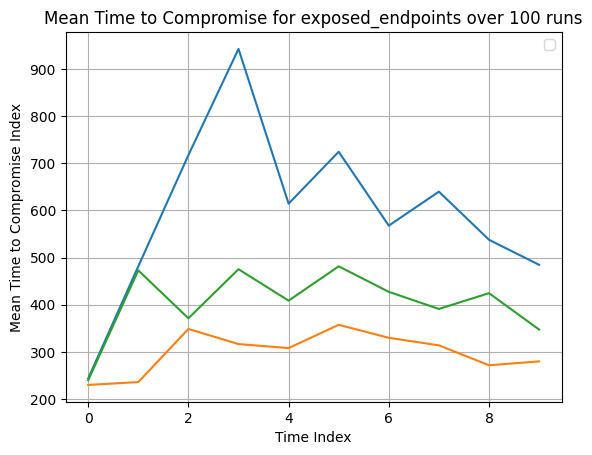

In [13]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["exposed_endpoints"]
model = "main_network_final_exposed_endpoints"
for run_index in range(1,101):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index')
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {"#".join(features)} over 100 runs')
plt.grid(True)
plt.legend()
plt.show()

